In [7]:
!pip install scikit-learn
!pip install --upgrade pixiedust

Requirement already up-to-date: pixiedust in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.1.18)


In [8]:
!pip install brunel
!pip install ibm_watson_machine_learning

import pixiedust
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import brunel

from ibm_watson_machine_learning import APIClient

     |████████████████████████████████| 2.2 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 50.9 MB/s eta 0:00:01
  Created wheel for brunel: filename=brunel-2.6.2-py3-none-any.whl size=2161246 sha256=e3175abd045c97df6877099c69849449fe96e0c229d574c96ae2973b15f8f445
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/5b/76/52/7910d0d24e582cc63e46b024289b84cdedf5e1919879ca136e
Successfully built brunel
Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repo

Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


/opt/conda/envs/Python-3.7-main/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/envs/Python-3.7-main/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/envs/Python-3.7-main/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/envs/Python-3.7-main/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
2021-01-06 06:09:06,399 - matplotlib.font_manager - WARNING - findfont: Font fam

In [9]:
raw_df=pixiedust.sampleData('https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv')

Downloaded 463947 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'



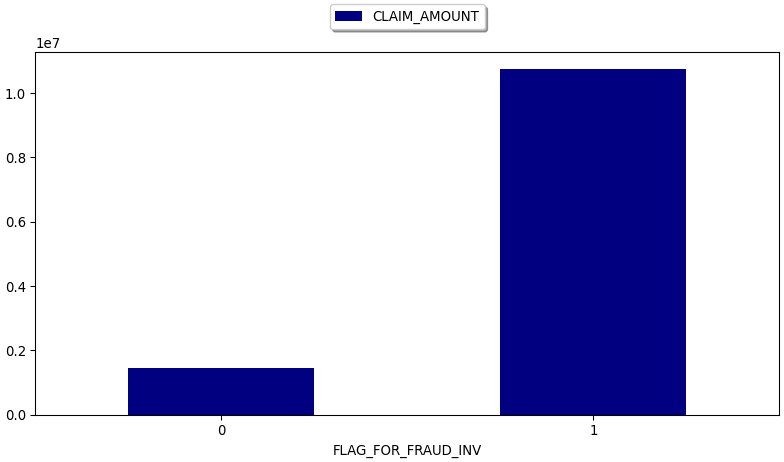

In [19]:
display(raw_df)

In [23]:
import pandasx as pd

ModuleNotFoundError: No module named 'pandasx'

In [25]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)>

In [29]:
raw_df["EXPIRY_DATE"]

0     2017-09-19
1     2018-06-14
2     2016-08-23
3     2016-07-24
4     2017-01-07
         ...    
970   2016-07-11
971   2016-07-20
972   2016-08-20
973   2017-04-21
974   2016-01-10
Name: EXPIRY_DATE, Length: 975, dtype: datetime64[ns]

In [34]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
raw_df["EXPIRY_DATE"] = pd.to_datetime(raw_df["EXPIRY_DATE"])
raw_df["LOSS_EVENT_TIME"] = pd.to_datetime(raw_df["LOSS_EVENT_TIME"])
raw_df["DAYS_FROM_LOSS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["EXPIRY_DATE"]
raw_df["DAYS_FROM_LOSS"] = abs(raw_df.DAYS_FROM_LOSS.dt.days)
raw_df.loc[raw_df['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'] = 1
raw_df.loc[raw_df['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'] = 0 

In [35]:
raw_df

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,PBKEY,DAYS_FROM_LOSS,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,EXCESSIVE_CLAIM_AMOUNT
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,2017-04-25,2017-04-28 00:00:00.0,...,-88.158922,147,1.0,481,0.0,6584,1.0,0.597260,263963.479358,1.0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,2018-08-26,2018-08-31 00:00:00.0,...,-87.903629,73,1.0,-211,1.0,2635,1.0,1.200000,188462.083333,0.0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,2016-01-07,2016-01-11 00:00:00.0,...,-87.590889,229,1.0,1412,0.0,3883,1.0,0.372603,225356.904412,1.0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,2016-12-11,2016-12-18 00:00:00.0,...,-87.724383,140,1.0,886,0.0,6119,1.0,1.383562,223748.830693,1.0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,2017-06-06,2017-06-08 00:00:00.0,...,-87.644831,150,1.0,1126,0.0,1798,1.0,1.410959,96837.618447,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,CM11612,GJI9724,QY3512250,A-2016-TJ210,3,NaN,1,77438.7,2016-11-29,2016-12-01 00:00:00.0,...,-87.931114,141,1.0,571,0.0,527,1.0,1.386301,55859.931818,1.0
971,HM55275,ORD4650,XR9202123,A-2016-EU678,1,NaN,3,219285.9,2016-08-14,2016-08-21 00:00:00.0,...,-88.113463,25,1.0,1097,0.0,826,1.0,1.068493,205229.111538,0.0
972,BA79937,BLV8655,TU0769843,A-2016-MT971,1,NaN,1,192320.1,2016-08-22,2016-09-03 00:00:00.0,...,-87.663237,2,0.0,1219,0.0,951,1.0,1.005479,191272.034060,1.0
973,AL29368,XBH9030,UU9571126,A-2017-ZX388,2,NaN,3,273023.9,2017-01-24,2017-02-04 00:00:00.0,...,-88.099887,87,1.0,1332,0.0,2539,1.0,0.761644,358466.631295,0.0


In [36]:
raw_df["SUSPICIOUS_CLAIM_TIME"].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [37]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)
raw_df["DRIVERS_LICENSE_EXPIRY"] = pd.to_datetime(raw_df["DRIVERS_LICENSE_EXPIRY"])
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df["DRIVERS_LICENSE_EXPIRY"] - raw_df["LOSS_EVENT_TIME"]
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df.DAYS_FROM_L_EXPIRY.dt.days
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] >= 0, 'EXPIRED_LICENSE'] = 0
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] < 0, 'EXPIRED_LICENSE'] = 1

In [62]:
# Days living at current address (date of loss - insurance_driver.date_at_current_address)
raw_df["DATE_AT_CURRENT_ADDRESS"] = pd.to_datetime(raw_df["DATE_AT_CURRENT_ADDRESS"])
raw_df["DAYS_AT_ADDRESS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["DATE_AT_CURRENT_ADDRESS"]
raw_df["DAYS_AT_ADDRESS"] = abs(raw_df.DAYS_AT_ADDRESS.dt.days)
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] >= 15, 'SUSPICIOUS_LIVING'] = 1
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] < 15, 'SUSPICIOUS_LIVING'] = 0

In [63]:
raw_df

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,EXCESSIVE_CLAIM_AMOUNT,LOW_MILEAGE_AT_LOSS,SUSPICIOUS_MILEAGE
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,2017-04-25,2017-04-28 00:00:00.0,...,1.0,481,0.0,6584,1.0,0.597260,263963.479358,1.0,0.0,0.0
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,2018-08-26,2018-08-31 00:00:00.0,...,1.0,-211,1.0,2635,1.0,1.200000,188462.083333,0.0,0.0,0.0
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,2016-01-07,2016-01-11 00:00:00.0,...,1.0,1412,0.0,3883,1.0,0.372603,225356.904412,1.0,0.0,1.0
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,2016-12-11,2016-12-18 00:00:00.0,...,1.0,886,0.0,6119,1.0,1.383562,223748.830693,1.0,0.0,0.0
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,2017-06-06,2017-06-08 00:00:00.0,...,1.0,1126,0.0,1798,1.0,1.410959,96837.618447,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,CM11612,GJI9724,QY3512250,A-2016-TJ210,3,NaN,1,77438.7,2016-11-29,2016-12-01 00:00:00.0,...,1.0,571,0.0,527,1.0,1.386301,55859.931818,1.0,0.0,0.0
971,HM55275,ORD4650,XR9202123,A-2016-EU678,1,NaN,3,219285.9,2016-08-14,2016-08-21 00:00:00.0,...,1.0,1097,0.0,826,1.0,1.068493,205229.111538,0.0,0.0,0.0
972,BA79937,BLV8655,TU0769843,A-2016-MT971,1,NaN,1,192320.1,2016-08-22,2016-09-03 00:00:00.0,...,0.0,1219,0.0,951,1.0,1.005479,191272.034060,1.0,0.0,0.0
973,AL29368,XBH9030,UU9571126,A-2017-ZX388,2,NaN,3,273023.9,2017-01-24,2017-02-04 00:00:00.0,...,1.0,1332,0.0,2539,1.0,0.761644,358466.631295,0.0,0.0,0.0


In [68]:
raw_df["SUSPICIOUS_CLAIM_TIME"].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [69]:
#7500/year
raw_df["START_DATE"] = pd.to_datetime(raw_df["START_DATE"])
#find number of days between policy creation and accident
raw_df["LENGTH_OF_POLICY"]=(raw_df["LOSS_EVENT_TIME"] - raw_df["START_DATE"]).dt.days
#convert to years
raw_df["LENGTH_OF_POLICY"]=raw_df["LENGTH_OF_POLICY"]/365
#divide Odometer at loss by years
raw_df["MILES/YEAR"] = raw_df["ODOMETER_AT_LOSS"]/raw_df["LENGTH_OF_POLICY"]
raw_df["MILES/YEAR"].value_counts()

145432.118234    1
234953.253233    1
55515.574648     1
123525.401515    1
198472.566993    1
                ..
98941.082789     1
100299.475188    1
61050.847328     1
54548.889011     1
170432.357027    1
Name: MILES/YEAR, Length: 975, dtype: int64

In [49]:
# Conflict on whether a policyholder with a low mileage discount experienced a loss with high mileage at the point of loss
raw_df.loc[raw_df["MILES/YEAR"] <7500, 'LOW_MILEAGE_AT_LOSS'] = 1
raw_df.loc[raw_df["MILES/YEAR"] >=7500, 'LOW_MILEAGE_AT_LOSS'] = 0

In [50]:
raw_df.loc[raw_df["LOW_MILEAGE_USE"]==raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 0
raw_df.loc[raw_df["LOW_MILEAGE_USE"]!=raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 1

In [51]:
raw_df.loc[raw_df["CLAIM_AMOUNT"] <3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 0
raw_df.loc[raw_df["CLAIM_AMOUNT"] >=3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 1

In [53]:
# dataframes for certain features
features = ['FLAG_FOR_FRAUD_INV',
'SUSPICIOUS_MILEAGE',
'EXPIRED_LICENSE',
'SUSPICIOUS_CLAIM_TIME',
'SUSPICIOUS_LIVING',
'EXCESSIVE_CLAIM_AMOUNT']

In [54]:
df_model = raw_df[features]

In [75]:
df_model = df_model.astype(int)

#or 
##ensure all relevant features are integers
# df_model["SUSPICIOUS_LIVING"] = df_model["SUSPICIOUS_LIVING"].astype(int)
# df_model["EXPIRED_LICENSE"] = df_model["EXPIRED_LICENSE"].astype(int)
# df_model["SUSPICIOUS_CLAIM_TIME"] = df_model["SUSPICIOUS_CLAIM_TIME"].astype(int)
# df_model["SUSPICIOUS_MILEAGE"] = df_model["SUSPICIOUS_MILEAGE"].astype(int)
# df_model["EXCESSIVE_CLAIM_AMOUNT"] = df_model["EXCESSIVE_CLAIM_AMOUNT"].astype(int)

In [56]:
raw_df.groupby("FLAG_FOR_FRAUD_INV", as_index=False).mean()

,FLAG_FOR_FRAUD_INV,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,...,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,EXCESSIVE_CLAIM_AMOUNT,LOW_MILEAGE_AT_LOSS,SUSPICIOUS_MILEAGE
0,0,2.926186,NaN,2.977153,180783.846046,0.281195,1.492091,41.857895,-87.675014,2521.147627,...,0.933216,894.546573,0.042179,3487.956063,0.996485,1.070159,205170.356701,0.086116,0.0,0.094903
1,1,3.041872,NaN,1.103448,175504.046305,0.637931,1.758621,41.860133,-87.679617,26429.480296,...,0.945813,917.960591,0.036946,3252.413793,1.000000,0.960490,230687.578997,0.933498,0.0,0.088670


In [60]:
#split data into x and y variable 

xVar = df_model[["EXPIRED_LICENSE","SUSPICIOUS_CLAIM_TIME","SUSPICIOUS_LIVING","SUSPICIOUS_MILEAGE","EXCESSIVE_CLAIM_AMOUNT"]]
yVar = df_model["FLAG_FOR_FRAUD_INV"]

In [61]:
xVar.head()

,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,1,1,0,1
1,1,1,1,0,0
2,0,1,1,1,1
3,0,1,1,0,1
4,0,1,1,0,0


In [77]:
#split into a test/train set
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(780, 5) (780,)
(195, 5) (195,)


In [65]:
#train model
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [66]:
#create confusion matrix to gut check model
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,100,8
1,8,79


In [ ]:
#above shows a confusion matrix (from sklearn)

In [78]:
from sklearn.metrics import accuracy_score